# Data Preprocessing
First, given such a huge dataset, let's see what it contains and how should we deal with it.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5);
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

Matplotlib is building the font cache; this may take a moment.


In [2]:
# The illustration of each columns
with open(r'./VariableDefinitions.txt', encoding='utf-8') as f:
    print(f.read())

﻿Train Customers


Information on the customers in the training set. 


'akeed_customer_id': Unique customer ID, used in train_locations and train_orders
'gender': Customer gender
'dob': Birth Year (if entered)
'status' and 'verified': Account status
'language': Chosen language
'Created_at' and 'updated_at': dates when account was created/updated


Train Locations


Each customer orders from one or more locations. Each is assigned a location number. 
'customer_id': The unique customer ID 
'location_number': Location number (most customers have one or two)
'location_type': Home, Work, Other or NA
'Latitude' and 'longitude': Not true latitude and longitude - locations have been masked, but nearby locations remain nearby in the new reference frame and can thus be used for clustering. However, not all locations are useful due to GPS errors and missing data - you may want to treat outliers separately.


Train Orders


This is a record of all orders made by customers in the train set from th

There are 4 parts of the information: vendor, orders, customer and location. Let's watch them one by one and clean them.

# Clean vendors.csv

In [4]:
df_vendor = pd.read_csv(r'd:/bdt/5003/project/vendors.csv')

In [5]:
df_vendor.shape

(100, 59)

In [6]:
df_vendor.describe()

,id,authentication_id,latitude,longitude,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,commission,discount_percentage,status,verified,rank,vendor_rating,open_close_flags,country_id,city_id,device_type,display_orders
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,85.0,100.000000,100.00000,100.000000,100.00000,100.000000,100.0,100.0,100.0,100.00,100.0
mean,288.840000,120050.760000,1.875505,0.803682,2.110000,0.413000,11.750000,0.85000,14.03000,0.0,1.100000,0.85000,0.880000,9.90000,4.350000,1.0,1.0,1.0,2.98,1.0
std,242.299994,3509.069064,20.600857,4.397859,0.314466,0.346018,4.108073,0.35887,4.31688,0.0,6.299751,0.35887,0.326599,3.14466,0.248836,0.0,0.0,0.0,0.20,0.0
min,4.000000,118597.000000,-1.787413,-1.449556,2.000000,0.000000,2.000000,0.00000,5.00000,0.0,0.000000,0.00000,0.000000,1.00000,3.200000,1.0,1.0,1.0,1.00,1.0
25%,105.750000,118702.750000,-0.809124,0.081618,2.000000,0.000000,8.000000,1.00000,10.00000,0.0,0.000000,1.00000,1.000000,11.00000,4.200000,1.0,1.0,1.0,3.00,1.0
50%,202.000000,118801.000000,-0.493421,0.527123,2.000000,0.700000,15.000000,1.00000,15.00000,0.0,0.000000,1.00000,1.000000,11.00000,4.400000,1.0,1.0,1.0,3.00,1.0
75%,387.250000,118990.250000,0.015915,0.644764,2.000000,0.700000,15.000000,1.00000,15.00000,0.0,0.000000,1.00000,1.000000,11.00000,4.500000,1.0,1.0,1.0,3.00,1.0
max,907.000000,132953.000000,205.242327,44.210807,3.000000,0.700000,15.000000,1.00000,45.00000,0.0,50.000000,1.00000,1.000000,11.00000,4.800000,1.0,1.0,1.0,3.00,1.0


numerical: latitude, longitude,delivery charge, serving distance, preparation_time, commission, discount percentage, 
categorical (binary) :vendor category id, is_open. 




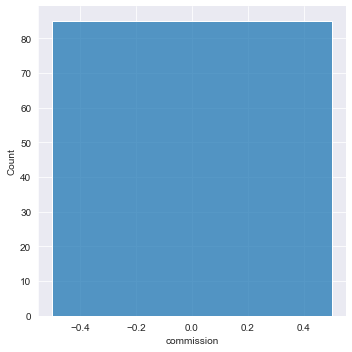

In [11]:
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None) 
sns.displot(df_vendor['commission'])


In [6]:
df_vendor.columns

Index(['id', 'authentication_id', 'latitude', 'longitude',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status', 'verified', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1',
       'saturday_from_time2', 'saturday

### Convert the float to int

In [7]:
df_vendor[['vendor_category_id', 'is_open', 'status', 'verified', 'open_close_flags','country_id','city_id']] = df_vendor[['vendor_category_id', 'is_open', 'status', 'verified', 'open_close_flags','country_id','city_id']].astype(int)

### Preparing for future join, rename the possible duplicate column

In [8]:
df_vendor = df_vendor.rename(columns={'latitude':'latitude_vendor','longitude':'longitude_vendor','status':'status_vendor','verified':'verified_vendor'})

### Drop the columns that are totally the same for all rows and didnt provide any infomation

In [9]:
df_vendor.columns

Index(['id', 'authentication_id', 'latitude_vendor', 'longitude_vendor',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status_vendor', 'verified_vendor', 'rank',
       'language', 'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1',
       'sat

In [10]:
df_vendor = df_vendor.drop(['commission','is_akeed_delivering','one_click_vendor','country_id','city_id','display_orders','open_close_flags'],axis=1)

### Deal with language column, one hot recode it, en = 1, nan = 0

In [11]:
df_vendor['language'].unique()

array(['EN', nan], dtype=object)

In [12]:
language_mapping = {'EN': 1}
df_vendor['language'] = df_vendor['language'].map(language_mapping)
df_vendor['language'].fillna(0, inplace=True)

In [13]:
df_vendor['language'].unique()

array([1., 0.])

### Deal with primary tags, dict to int, nan = 0

In [14]:
f = lambda x: x.split('\"')[3]
df_vendor['primary_tags'] = df_vendor['primary_tags'].map(f, na_action='ignore')
df_vendor['primary_tags'].fillna(0, inplace=True)

In [15]:
df_vendor['primary_tags']

0        4
1        7
2       71
3       46
4       32
      ... 
95    2396
96    2396
97    2396
98    2396
99      24
Name: primary_tags, Length: 100, dtype: object

### One hot recode vendor category, restaurants = 1, sweets & bakes = 2

In [16]:
df_vendor['vendor_category_en'] = df_vendor['vendor_category_en'].map({'Restaurants':1, 'Sweets & Bakes': 2})

### Drop all time info

In [17]:
df_vendor = df_vendor.drop(['OpeningTime','OpeningTime2',
                'sunday_from_time1','sunday_to_time1',
                'sunday_from_time2','sunday_to_time2',
                 'monday_from_time1','monday_to_time1',
                'monday_from_time2','monday_to_time2',
                 'tuesday_from_time1','tuesday_to_time1',
                'tuesday_from_time2','tuesday_to_time2',
                 'wednesday_from_time1','wednesday_to_time1',
                'wednesday_from_time2','wednesday_to_time2',
                 'thursday_from_time1','thursday_to_time1',
                'thursday_from_time2','thursday_to_time2',
                'friday_from_time1','friday_to_time1',
                'friday_from_time2','friday_to_time2',
                 'saturday_from_time1','saturday_to_time1',
                'saturday_from_time2','saturday_to_time2',
                'created_at','updated_at'
               ],axis=1)

### Deal with vendor tag

In [18]:
df_vendor_tag = df_vendor.loc[:,['vendor_tag']]
df_vendor_tag_name = df_vendor.loc[:, ['vendor_tag_name']]
vendor_tag={}
for i in range(df_vendor_tag.shape[0]):
    if not pd.isna(df_vendor_tag.iloc[i, 0]):
        vendor_tag_lst = df_vendor_tag.iloc[i, 0].split(',')
        vendor_tag_name_lst = df_vendor_tag_name.iloc[i, 0].split(',')
        for j in range(len(vendor_tag_lst)):
            if vendor_tag_lst[j] not in vendor_tag:
                vendor_tag[vendor_tag_lst[j]] = vendor_tag_name_lst[j]

In [19]:
for i in vendor_tag.values():
    df_vendor[i] = 0

In [20]:
for i in range(df_vendor.shape[0]):
    if not pd.isna(df_vendor['vendor_tag'].iat[i]):
        row = df_vendor.iloc[i, :]
        lst = row['vendor_tag'].split(',')

        for j in lst:
            df_vendor[vendor_tag[j]].iat[i] = 1

In [21]:
df_vendor = df_vendor.drop(['vendor_tag', 'vendor_tag_name'], axis=1)
df_vendor.head()

,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_vendor,verified_vendor,rank,language,vendor_rating,primary_tags,device_type,Arabic,Breakfast,Burgers,Desserts,Free Delivery,Grills,Lebanese,Salads,Sandwiches,Shawarma,Cakes,Crepes,Italian,Pasta,Pizzas,Soups,Indian,Fries,Mexican,American,Milkshakes,Asian,Healthy Food,Japanese,Sushi,Mojitos,Mandazi,Omani,Manakeesh,Kids meal,Donuts,Fresh Juices,Ice creams,Pancakes,Waffles,Hot Dogs,Dimsum,Rice,Sweets,Steaks,Pizza,Mishkak,Biryani,Thali,Vegetarian,Pastry,Seafood,Chinese,Thai,Coffee,Organic,Smoothies,Karak,Rolls,Hot Chocolate,Pastas,Combos,Bagels,Churros,Shuwa,Frozen yoghurt,Kushari,Spanish Latte,Family Meal,Kebabs,Cafe,Fatayers
0,4,118597.0,-0.588596,0.754434,1,2,0.0,6.0,1,15,0.0,1,1,11,1.0,4.4,4,3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,118608.0,-0.471654,0.744470,1,2,0.7,5.0,1,14,0.0,1,1,11,1.0,4.7,7,3,0,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20,118616.0,-0.407527,0.643681,1,2,0.0,8.0,1,19,0.0,1,1,1,1.0,4.5,71,3,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,23,118619.0,-0.585385,0.753811,1,2,0.0,5.0,1,16,0.0,1,1,11,1.0,4.5,46,3,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,28,118624.0,0.480602,0.552850,1,2,0.7,15.0,1,10,0.0,1,1,11,1.0,4.4,32,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# no na check
df_vendor[df_vendor.isnull().any(axis=1)]

,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_vendor,verified_vendor,rank,language,vendor_rating,primary_tags,device_type,Arabic,Breakfast,Burgers,Desserts,Free Delivery,Grills,Lebanese,Salads,Sandwiches,Shawarma,Cakes,Crepes,Italian,Pasta,Pizzas,Soups,Indian,Fries,Mexican,American,Milkshakes,Asian,Healthy Food,Japanese,Sushi,Mojitos,Mandazi,Omani,Manakeesh,Kids meal,Donuts,Fresh Juices,Ice creams,Pancakes,Waffles,Hot Dogs,Dimsum,Rice,Sweets,Steaks,Pizza,Mishkak,Biryani,Thali,Vegetarian,Pastry,Seafood,Chinese,Thai,Coffee,Organic,Smoothies,Karak,Rolls,Hot Chocolate,Pastas,Combos,Bagels,Churros,Shuwa,Frozen yoghurt,Kushari,Spanish Latte,Family Meal,Kebabs,Cafe,Fatayers


In [23]:
df_vendor.to_csv(r'/mnt/d/bdt/5003/project/cleaned_vendors.csv')

# Clean customer.csv

In [24]:
df_customer = pd.read_csv(r'd:/bdt/5003/project/test_customers.csv')

In [25]:
df_customer.head()

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36
1,FWNUI71,Male,NaN,1,1,EN,2018-03-22 20:11:47,2018-03-22 20:11:47
2,LRX7BCH,Male,NaN,1,1,EN,2018-04-17 20:01:15,2018-04-17 20:01:15
3,D96DHMD,Male,NaN,1,1,EN,2018-04-29 22:35:52,2018-04-29 22:35:52
4,88Q8Y5V,Male,1997.0,1,1,EN,2018-05-05 12:38:09,2018-05-05 12:38:09


In [26]:
df_customer = df_customer.rename(columns={'status':'status_customer','verified':'verified_customer', 'language':'language_customer'})

In [27]:
df_customer = df_customer.drop(['created_at', 'updated_at'],axis=1)

### Deal with Gender

In [28]:
df_customer['gender'].unique()

array(['Male', 'Female', 'Female  ', 'Female ', 'Male  ', nan, 'male'],
      dtype=object)

In [29]:
df_customer['gender'].fillna(0, inplace=True)

In [30]:
def mapGender(s):
    if s != 0:
        s = s.strip()
        s = s.lower()
        if s == 'male': return 1
        if s == 'female': return 2
    else:
        return 0
df_customer['gender'] = df_customer['gender'].map(mapGender)

In [31]:
df_customer.head()

,akeed_customer_id,gender,dob,status_customer,verified_customer,language_customer
0,ICE2DJP,1,NaN,1,1,EN
1,FWNUI71,1,NaN,1,1,EN
2,LRX7BCH,1,NaN,1,1,EN
3,D96DHMD,1,NaN,1,1,EN
4,88Q8Y5V,1,1997.0,1,1,EN


### Deal with language

In [32]:
df_customer['language_customer'].unique()

array(['EN', nan], dtype=object)

In [33]:
language_mapping = {'EN': 1}
df_customer['language_customer'] = df_customer['language_customer'].map(language_mapping)
df_customer['language_customer'].fillna(0, inplace=True)
df_customer[['language_customer']] = df_customer[['language_customer']].astype(int)

In [34]:
df_customer['language_customer'].unique()

array([1, 0])

### Deal with DOB

In [35]:
df_customer['dob'].fillna(0, inplace=True)
df_customer[['dob']] = df_customer[['dob']].astype(int)

In [36]:
df_customer.head()

,akeed_customer_id,gender,dob,status_customer,verified_customer,language_customer
0,ICE2DJP,1,0,1,1,1
1,FWNUI71,1,0,1,1,1
2,LRX7BCH,1,0,1,1,1
3,D96DHMD,1,0,1,1,1
4,88Q8Y5V,1,1997,1,1,1


In [37]:
df_customer[df_customer.isnull().any(axis=1)]

,akeed_customer_id,gender,dob,status_customer,verified_customer,language_customer


In [38]:
df_customer.to_csv(r'/mnt/d/bdt/5003/project/cleaned_train_customer.csv')

# Clean Orders

In [10]:
df_order = pd.read_csv(r'd:/bdt/5003/project/orders.csv')

c:\users\77377\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
nan = 0
nonnan = 0
df_order['delivery_time'].fillna(-1, inplace=True)
for i in df_order['delivery_time'].unique():
    if i == -1: 
        nan+=1
    else:
        nonnan +=1
        

In [36]:
tot = nan+nonnan
print(nan/tot)
print(nonnan/tot)

0.00020729684908789387
0.9997927031509121


In [62]:
df_order.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,2019-08-01 04:03:00,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


### Drop all the rows with 0 item_count

In [63]:
df_order = df_order[df_order['item_count'].notna()]

In [64]:
df_order[['item_count']] = df_order[['item_count']].astype(int)

### Deal with promo code

In [65]:
def mapPromoCode(s):
    if pd.isna(s):
        return 0
    else:
        return 1
df_order['promo_code'] = df_order['promo_code'].map(mapPromoCode)

In [66]:
def mapPromoPercentage(s):
    if pd.isna(s):
        return 0
    else:
        return s
df_order['promo_code_discount_percentage'] = df_order['promo_code_discount_percentage'].map(mapPromoPercentage)

### Deal with is favourite / is rate

In [67]:
def mapYesNo(s):
    if pd.isna(s):
        return 0
    elif s == 'Yes':
        return 1
    else:
        return 2
df_order['is_favorite'] = df_order['is_favorite'].map(mapYesNo)
df_order['is_rated'] = df_order['is_rated'].map(mapYesNo)

### Deal with vendor rating, No rating = -1

In [68]:
df_order['vendor_rating'].fillna(-1, inplace=True)
df_order[['vendor_rating']] = df_order[['vendor_rating']].astype(int)

In [69]:
# deal with preparationtime na
df_order['preparationtime'].fillna(-1, inplace=True)

In [70]:
# df_order['delivery_time','order_accepted_time','driver_accepted_time',
#                          'ready_for_pickup_time','picked_up_time','delivered_time',
#                          'delivery_date'].fillna(-1, inplace=True)
time_lst = ['delivery_time','order_accepted_time','driver_accepted_time',
                         'ready_for_pickup_time','picked_up_time','delivered_time',
                         'delivery_date','created_at']
for i in time_lst:
    
    df_order[i+'_year'] = 0
    df_order[i+'_month'] = 0
    df_order[i+'_day'] = 0
    df_order[i+'_hour'] = 0
    df_order[i+'_minute'] = 0
    
    for j in range(len(df_order[i])):
        timeobj = df_order[i].iat[j]
        if not pd.isna(timeobj):
            ymd = timeobj.split(' ')[0]
            hms = timeobj.split(' ')[1]
            ymd = ymd.split('-')
            year = ymd[0]
            month=ymd[1]
            day = ymd[2]
            hms = hms.split(':')
            hour = hms[0]
            minute = hms[1]
            df_order[i+'_year'].iat[j] = year
            df_order[i+'_month'].iat[j] = month
            df_order[i+'_day'].iat[j] = day
            df_order[i+'_hour'].iat[j] = hour
            df_order[i+'_minute'].iat[j] = minute
        if j % 20000 ==0 : print(j)
    
    print(i)

0
20000
40000
60000
80000
100000
120000
delivery_time
0
20000
40000
60000
80000
100000
120000
order_accepted_time
0
20000
40000
60000
80000
100000
120000
driver_accepted_time
0
20000
40000
60000
80000
100000
120000
ready_for_pickup_time
0
20000
40000
60000
80000
100000
120000
picked_up_time
0
20000
40000
60000
80000
100000
120000
delivered_time
0
20000
40000
60000
80000
100000
120000
delivery_date
0
20000
40000
60000
80000
100000
120000
created_at


In [71]:
df_order = df_order.drop(['delivery_time','order_accepted_time','driver_accepted_time',
                         'ready_for_pickup_time','picked_up_time','delivered_time',
                         'delivery_date','created_at'],axis=1)

### One-hot encode location type nan=0, work = 1, home = 2, other = 3

In [72]:
df_order['LOCATION_TYPE'] = df_order['LOCATION_TYPE'].map({np.nan:0, 'Work': 1, 'Home':2, 'Other':3})

In [73]:
df_order.to_csv(r'/mnt/d/bdt/5003/project/cleaned_orders.csv')

In [74]:
df_order.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,vendor_id,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR,delivery_time_year,delivery_time_month,delivery_time_day,delivery_time_hour,delivery_time_minute,order_accepted_time_year,order_accepted_time_month,order_accepted_time_day,order_accepted_time_hour,order_accepted_time_minute,driver_accepted_time_year,driver_accepted_time_month,driver_accepted_time_day,driver_accepted_time_hour,driver_accepted_time_minute,ready_for_pickup_time_year,ready_for_pickup_time_month,ready_for_pickup_time_day,ready_for_pickup_time_hour,ready_for_pickup_time_minute,picked_up_time_year,picked_up_time_month,picked_up_time_day,picked_up_time_hour,picked_up_time_minute,delivered_time_year,delivered_time_month,delivered_time_day,delivered_time_hour,delivered_time_minute,delivery_date_year,delivery_date_month,delivery_date_day,delivery_date_hour,delivery_date_minute,created_at_year,created_at_month,created_at_day,created_at_hour,created_at_minute
0,163238.0,92PEE24,1,7.6,2,0,0.0,0.0,0,2,-1,0.0,0.0,-1.0,105,0,0,92PEE24 X 0 X 105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,7,31,5,30,2019,8,1,5,30
1,163240.0,QS68UD8,1,8.7,1,0,0.0,0.0,0,2,-1,0.0,0.0,-1.0,294,0,1,QS68UD8 X 0 X 294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,7,31,5,30,2019,8,1,5,31
2,163241.0,MB7VY5F,2,14.4,1,0,0.0,0.0,0,2,-1,0.0,0.0,-1.0,83,0,0,MB7VY5F X 0 X 83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,7,31,5,30,2019,8,1,5,31
3,163244.0,KDJ951Y,1,7.1,1,0,0.0,0.0,0,2,-1,0.0,0.0,-1.0,90,0,2,KDJ951Y X 0 X 90,2019,8,1,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,7,31,5,30,2019,8,1,5,34
4,163245.0,BAL0RVT,4,27.2,1,0,0.0,0.0,0,2,-1,0.0,0.0,-1.0,83,0,1,BAL0RVT X 0 X 83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,7,31,5,30,2019,8,1,5,35


# Clean train_location.csv

In [76]:
df_loc= pd.read_csv(r'/mnt/d/bdt/5003/project/train_locations.csv')

In [77]:
df_loc.head()

,customer_id,location_number,location_type,latitude,longitude
0,02SFNJH,0,NaN,1.682392,-78.789737
1,02SFNJH,1,NaN,1.679137,0.766823
2,02SFNJH,2,NaN,-0.498648,0.661241
3,RU43CXC,0,Home,0.100853,0.438165
4,BDFBPRD,0,NaN,2.523125,0.733464


In [79]:
df_loc['location_type'] = df_loc['location_type'].map({np.nan:0, 'Work': 1, 'Home':2, 'Other':3})

In [80]:
df_loc.to_csv(r'/mnt/d/bdt/5003/project/cleaned_train_locations.csv')